# Sentiment analysis of IMDb movie reviews

![alt text](https://i.redd.it/p7fffxg63tp01.jpg)

**Nguyet Vo**

**INTRODUCTION:**

IMDb (Internet Movie Database) is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, fan and critical reviews, and ratings. An additional fan feature, message boards, was abandoned in February 2017. Originally a fan-operated website, the database is owned and operated by IMDb.com, Inc., a subsidiary of Amazon. By late 1990, the lists included almost 10,000 movies and television series correlated with actors and actresses appearing therein. On October 17, 1990, Needham developed and posted a collection of Unix shell scripts which could be used to search the four lists, and thus the database that would become the IMDb was born.At the time, it was known as the rec.arts.movies movie database. Internet Movie Database users are invited to participate in the site's ever-growing wealth of information by rating movies on a rating scale. The labeled dataset consists of 50,000 IMDB movie reviews. No individual movie has more than 30 reviews. The 25,000 reviews labeled training set does not include any of the same movies as the 25,000 review test set.

There are three columns in the movie review dataset:
- Id
- Review
- Sentiment

There are two classes in the movie review dataset:
- 1 : >= 7 rating
- 0: < 5 rating

This project explores the applicability of machine learning based classification techniques:
-  Logistic Regression



In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt

import warnings # This is just to hide the warnings, you don't have to worry about this
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [0]:
# Read data
df  = pd.read_csv('gdrive/My Drive/FTMLE - Tonga/Data/movie_review.csv', encoding='utf-8', sep='\t')

In [6]:
df.sample(5)

,id,review,sentiment
16214,5471_8,During 1933 this film had many cuts taken from...,1
19191,6666_7,I can't say that this film deserves anywhere n...,1
4718,8848_7,I watched this film in a very strange way -- I...,1
17168,12441_4,Some things need to be clarified. The picture ...,0
13598,5847_10,"Though this series only ran a season, it has s...",1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [17]:
df['sentiment'].value_counts()

1    11278
0    11222
Name: sentiment, dtype: int64

I have a balanced dataset with 11,278 labeled 1 observations and 11,222 labled 0 observations.

# DATA CLEAN UP

In [0]:
from collections import Counter
vocab = Counter()
for document in df['review']:
  for word in document.split(' '):
    vocab[word] += 1

In [23]:
vocab.most_common(20)

[('the', 258519),
 ('a', 139707),
 ('and', 137397),
 ('of', 128750),
 ('to', 119278),
 ('is', 92935),
 ('in', 77245),
 ('I', 59255),
 ('that', 57991),
 ('this', 51379),
 ('it', 48865),
 ('/><br', 45851),
 ('was', 42004),
 ('as', 38288),
 ('with', 37496),
 ('for', 36919),
 ('The', 30399),
 ('but', 30350),
 ('on', 27738),
 ('movie', 27342)]

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
vocab_reduced = Counter()
for word, count in vocab.items():
  if not word in stop:
    vocab_reduced[word] = count

vocab_reduced.most_common(20)

[('I', 59255),
 ('/><br', 45851),
 ('The', 30399),
 ('movie', 27342),
 ('film', 24768),
 ('one', 18704),
 ('like', 16278),
 ('This', 11074),
 ('would', 10720),
 ('good', 10243),
 ('It', 9853),
 ('really', 9773),
 ('even', 9530),
 ('see', 9077),
 ('-', 8181),
 ('get', 7857),
 ('story', 7652),
 ('much', 7634),
 ('time', 7028),
 ('make', 6719)]

In [0]:
import re

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
df['review_fix'] = df['review'].apply(preprocessor)

In [28]:
df['review_fix'][0]

'with all this stuff going down at the moment with mj i ve started listening to his music watching the odd documentary here and there watched the wiz and watched moonwalker again maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent moonwalker is part biography part feature film which i remember going to see at the cinema when it was originally released some of it has subtle messages about mj s feeling towards the press and also the obvious message of drugs are bad m kay visually impressive but of course this is all about michael jackson so unless you remotely like mj in anyway then you are going to hate this and find it boring some may call mj an egotist for consenting to the making of this movie but mj and most of his fans would say that he made it for the fans which if true is really nice of him the actual feature film bit when it finally starts is only on for 20 minutes o

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

stop = stopwords.words('english')

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)


In [30]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function preprocessor at 0x7f91acdb3950>,
                smooth_idf=True,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_porter at 0x7f91acdb3840>,
               

In [0]:
# Text stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter (text):
  token = []
  for word in text.split():
    token.append (porter.stem(word))

  return token

def get_stemmed_text(corpus):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews = get_stemmed_text(data)

In [34]:
# Lemmatization works -> identifying the part-of-speech of a given word and then applying more complex rules to transform the word into its true root.
nltk.download('wordnet')

def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

lemmatized_reviews = get_lemmatized_text(data)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [38]:
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
#Text normalization
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'each', "it's", 'below', 'mustn', 'at', 'not', 'about', 'hadn', 'their', 'had', 'theirs', 'all', 't', 'than', "hasn't", 'so', 'after', "that'll", 'itself', 'mightn', 'd', 'own', "don't", 'aren', 'these', 'hers', 've', "wouldn't", 'himself', 'before', "you're", 'yourself', 'it', 'isn', "isn't", 'yours', "doesn't", 'again', "hadn't", 'against', "should've", 'but', 'such', 'ain', 'who', 'will', 'if', 'i', 'of', "you've", "didn't", 'up', 'just', 'with', 'and', 'didn', 'myself', 'll', 'ours', 'them', 'her', 're', 'o', 'on', 'they', 'ourselves', 'him', 'above', 'haven', 'having', 'only', "shan't", "mightn't", 'during', 'does', 'from', 'why', 'those', 'the', "mustn't", 'themselves', 'very', 'we', 'here', "weren't", "you'd", 'when', 'once', 'be', "wasn't", "couldn't", "she's", "shouldn't", 'whom', 'being', 'were', 'under', 'because', 'while', 's', 'doing', 'that', 'm', 'then', 'a', 'have', "you'll", 'to', 'through', 'your', 'hasn', 'did', "haven't", "needn't", 'off', 'his', 'been', 'down', 'a

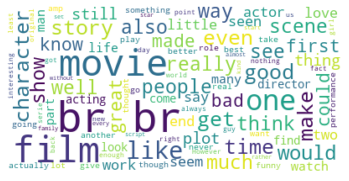

In [39]:
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

text = " ".join(review for review in data.review)

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords=stopwords.words("english")).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

In [91]:
df.sample(10)

,id,review,sentiment,review_fix
7472,3748_10,I've watched it plenty of times and I'm planni...,1,i ve watched it plenty of times and i m planni...
3303,4847_9,This film is one of those nostalgia things wit...,1,this film is one of those nostalgia things wit...
21406,10470_1,What else is left to say?<br /><br />I've read...,0,what else is left to say i ve read all the rev...
17161,5906_8,Doghi is a wonderful movie and Renuka Daftarda...,1,doghi is a wonderful movie and renuka daftarda...
17368,3328_7,"It's rare, nowadays, to find a romantic comedy...",1,it s rare nowadays to find a romantic comedy t...
9310,9606_10,This was the best movie I've ever seen about B...,1,this was the best movie i ve ever seen about b...
5381,448_10,I think this movie is absolutely beautiful. An...,1,i think this movie is absolutely beautiful and...
5986,11249_7,I have just watched the whole 6 episodes on DV...,1,i have just watched the whole 6 episodes on dv...
8385,2236_1,I don't really know where to start. The acting...,0,i don t really know where to start the acting ...
21322,6501_1,"This movie is once again, one of those movies ...",0,this movie is once again one of those movies t...


# Classification

In [0]:
from sklearn.model_selection import train_test_split

X = df['review_fix']

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# A pipeline is what chains several steps together, once the initial exploration is done. 
# For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, 
# or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm,
# they are estimators. Pipeline chains all these together which can then be applied to training data
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f91acdb3950>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'myself', '...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f91acdb3840>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
         

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict (X_test)
print('The accuracy score is:',accuracy_score(y_test,predictions))
print('The confusion matrix is:','\n',confusion_matrix(y_test,predictions))
print('The classification report is:','\n',classification_report(y_test,predictions))

The accuracy score is: 0.886
The confusion matrix is: 
 [[1910  290]
 [ 223 2077]]
The classification report is: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      2200
           1       0.88      0.90      0.89      2300

    accuracy                           0.89      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.89      0.89      0.89      4500



**Evaluation Test**

In [0]:
data = pd.read_csv('/content/gdrive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', encoding='utf-8', sep='\t')

In [74]:
data.sample(5)

,id,review
1895,308_1,"Mere thoughts of \Going Overboard\"" (aka \""Bab..."
2388,7442_7,I rented the film (I don't think it got a thea...
775,5595_7,Polanski returns to the themes of solitude and...
617,7756_2,I remember watching ATTACK when it first came ...
158,7525_2,In this 'sequel' Bruce is still called Billy L...


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2500 non-null   object
 1   review  2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [76]:
X_evaluate = data.review
X_evaluate.shape

(2500,)

In [77]:
evaluate_pred = clf.predict(X_evaluate)
evaluate_pred.shape, evaluate_pred

((2500,), array([0, 0, 1, ..., 1, 0, 1]))

In [0]:
df_evaluate_pred = pd.DataFrame(evaluate_pred)

In [79]:
df_evaluate_pred.columns = ['prediction']
df_evaluate_pred

,prediction
0,0
1,0
2,1
3,0
4,0
...,...
2495,1
2496,1
2497,1
2498,0


In [80]:
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [83]:
predictions_1 = clf.predict(X_evaluate)
accuracy_score(y_test, predictions)

0.886

In [0]:
predictions_values = predictions_1.tolist()

In [0]:
data['predictions'] = predictions_values

In [86]:
data

,id,review,predictions
0,10633_1,I watched this video at a friend's house. I'm ...,0
1,4489_1,`The Matrix' was an exciting summer blockbuste...,0
2,3304_10,This movie is one among the very few Indian mo...,1
3,3350_3,The script for this movie was probably found i...,0
4,1119_1,Even if this film was allegedly a joke in resp...,0
...,...,...,...
2495,1065_10,"Dark Angel is a futuristic sci-fi series, set ...",1
2496,7261_3,This British-Spanish co-production is one of t...,1
2497,11075_10,"Having read the reviews for this film, I under...",1
2498,2041_2,Well I'll start with the good points. The movi...,0


In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2200
           1       0.88      0.90      0.89      2300

    accuracy                           0.89      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.89      0.89      0.89      4500



In [0]:
data.to_csv('/content/gdrive/My Drive/CS_FTMLE_DataAnalysisTest_Vo Thi Kim Nguyet/nguyetvo.csv', index = False, header = True)

In [0]:
#Save the Optimized Model

import pickle
import os

pickle.dump(clf, open(os.path.join('.', 'nguyetvo_logisticRegression_week5.pkl'), 'wb'), protocol=4)

# **Models Performance Summary**

Models : Logistic Regression

Accuracy: 0.886

**Conclusion**

Sentiment classification methods above identify texts from the review dataset according to the users opinions toward movies, which are both negative (0) and positive (1). The extracted data should further enhance using feature classification techniques and these methopologies facilitate the keywords from the users reviews.